<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/VLCmulti_levels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = pd.read_excel('data_5.xlsx')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524288 entries, 0 to 524287
Data columns (total 2 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Samples - Analog Ch AIN3A      524288 non-null  int64  
 1   Voltage (V) - Analog Ch AIN3A  524288 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 8.0 MB


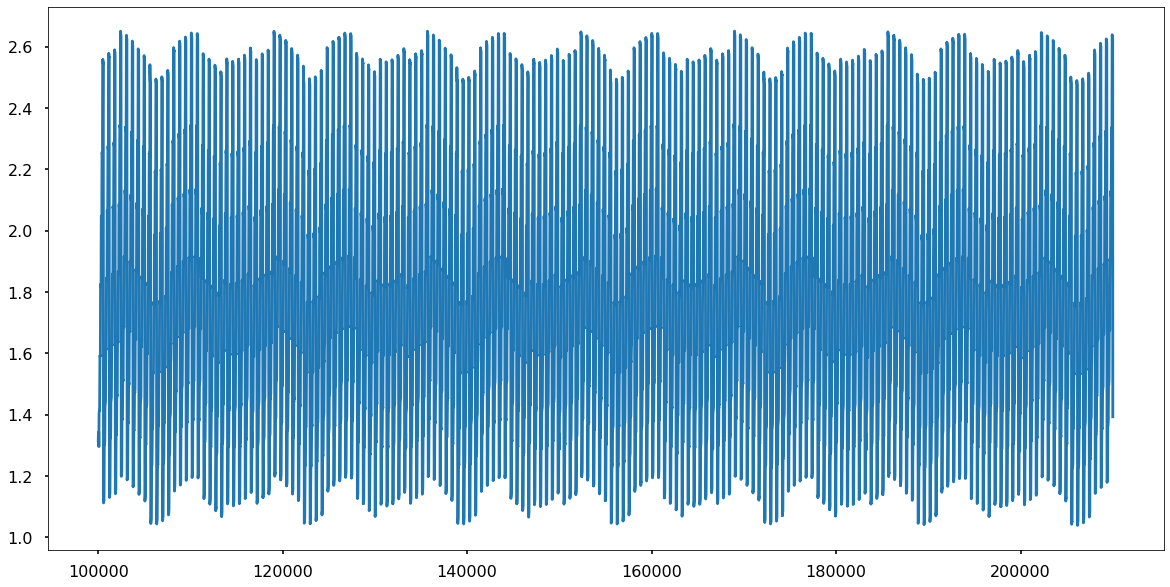

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(data['Voltage (V) - Analog Ch AIN3A'][100000:210000])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
volt_df=pd.DataFrame(data,
            columns=['Voltage (V) - Analog Ch AIN3A'])
#volt_df = data['Voltage (V) - Analog Ch AIN3A']
volt_norm = scaler.fit_transform(np.array(volt_df).reshape(-1,1))

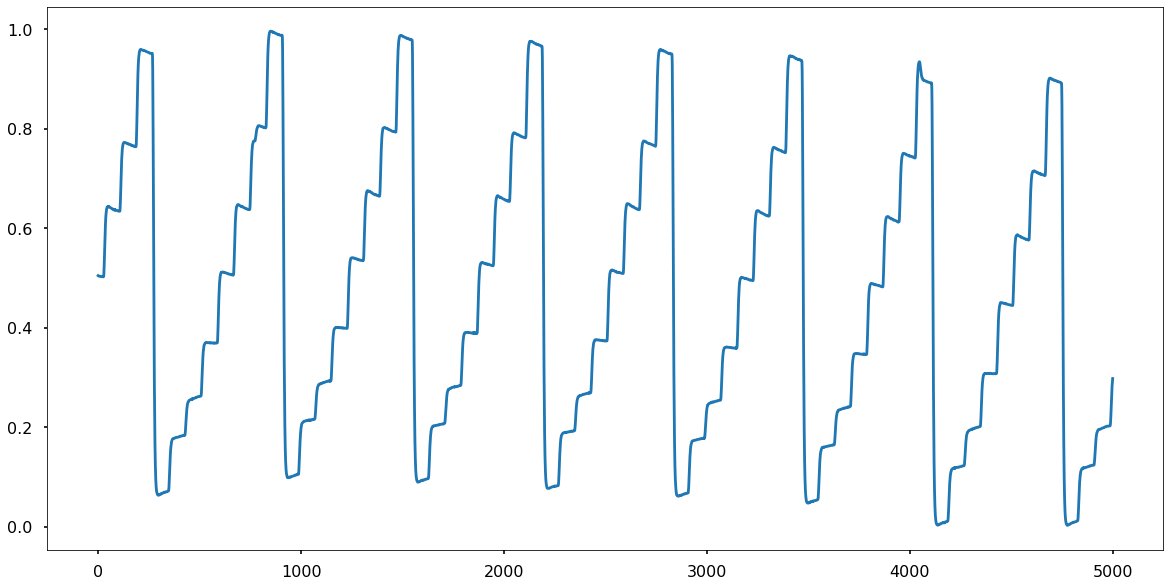

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(volt_norm[35000:40000])

(array([61486., 62059., 57933., 98859., 60318., 62234., 59757., 61642.]),
 array([0.   , 0.12 , 0.205, 0.28 , 0.485, 0.61 , 0.725, 0.875, 1.   ]),
 <a list of 8 Patch objects>)

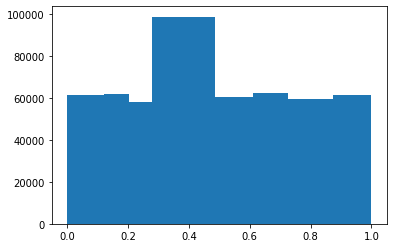

In [ ]:
plt.hist(volt_norm, bins=[0. , 0.12, 0.205 , 0.28, 0.485  , 0.61, 0.725 , 0.875, 1.])

(array([65105., 99164., 76617., 56419., 57419., 62086., 45836., 61642.]),
 array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ]),
 <a list of 8 Patch objects>)

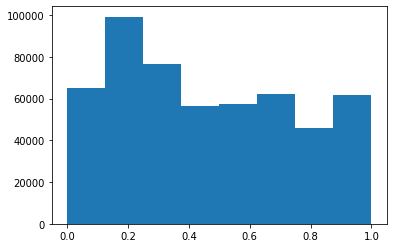

In [ ]:
plt.hist(volt_norm, bins=8)

FFT analysis

In [ ]:
from scipy.fftpack import fft, ifft, fftshift
import matplotlib.pyplot as plt
import numpy as np
from numpy import fft

plt.style.use('seaborn-poster')
%matplotlib inline

# fs=1e6
# len=10240     
# NFFT=1024 #NFFT-point DFT      
# x = volt_norm[0:len]
# #X=fft(x,NFFT) #compute DFT using FFT    

# # fig1, ax = plt.subplots(nrows=1, ncols=1) #create figure handle
# # nVals = np.arange(start = 0,stop = NFFT) # raw index for FFT plot
# # ax.plot(nVals,np.abs(X))      
# # ax.set_title('Double Sided FFT - without FFTShift')
# # ax.set_xlabel('Sample points (N-point DFT)')        
# # ax.set_ylabel('DFT Values')
# # fig1.show()
# # Moisture_mean_x = pd.read_excel("signal.xlsx", header = None)
# # Moisture_mean_x = pd.rolling_mean(Moisture_mean_x, 10) # doesn't helps
# # Moisture_mean_x = Moisture_mean_x.dropna()
# # Moisture_mean_x = Moisture_mean_x -Moisture_mean_x.mean()
frate = fs #/sec           
Hn = fft.fft(x)

freqs = fft.fftfreq(len(Hn), 1/frate)
idx = np.argmax(np.abs(Hn))
freq_in_hertz = freqs[idx]

TypeError: ignored

In [ ]:
import numpy
from matplotlib import pyplot 
   
# assigning time values of the signal
# initial time period, final time period and phase angle
#signalTime = numpy.arange(5, 10, 0.25);
  
# getting the amplitude of the signal
#signalAmplitude = numpy.sin(signalTime)
  
Fs = 1
  
x = volt_norm[0:100000].reshape(-1,)
# plotting the phase spectrum of the signal 
pyplot.phase_spectrum(x, Fs=1e3,  color ='green')
  
pyplot.title("Phase Spectrum of the Signal")
pyplot.show()

### Frequency Analysis

In [ ]:
from scipy import pi
from scipy.fftpack import fft

sample_rate = 1000
N = (10 - 0) * sample_rate
#N = np.shape(volt_norm)[0]

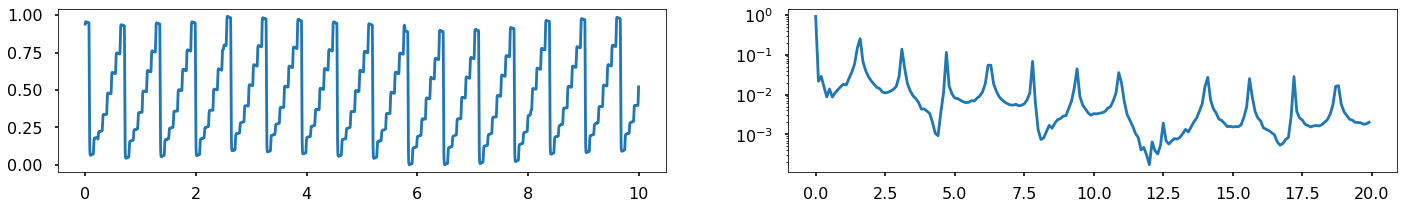

In [ ]:

x = volt_norm[0:N].reshape(-1,)

plt.figure(figsize=(24,3))

t = np.linspace(0, 10, N)
plt.subplot(1,2,1)
plt.plot (t,x)

fft_s = fft(x)
fre = np.linspace (0.0, int(sample_rate/2), int (N/2))
y = 2/N*np.abs(fft_s[0:np.int(N/2)])
plt.subplot(1,2,2)
L1, L2= 0, 200
plt.plot (fre[L1:L2],y[L1:L2])
plt.yscale('log')

In [179]:
from scipy.signal import savgol_filter
X = volt_norm.reshape(-1,)
filter_VLC = savgol_filter(X, window_length = 511, polyorder =1)
filter_VLC = savgol_filter(filter_VLC, window_length = 1821, polyorder =3) #1511

bwrVLC =  X - filter_VLC

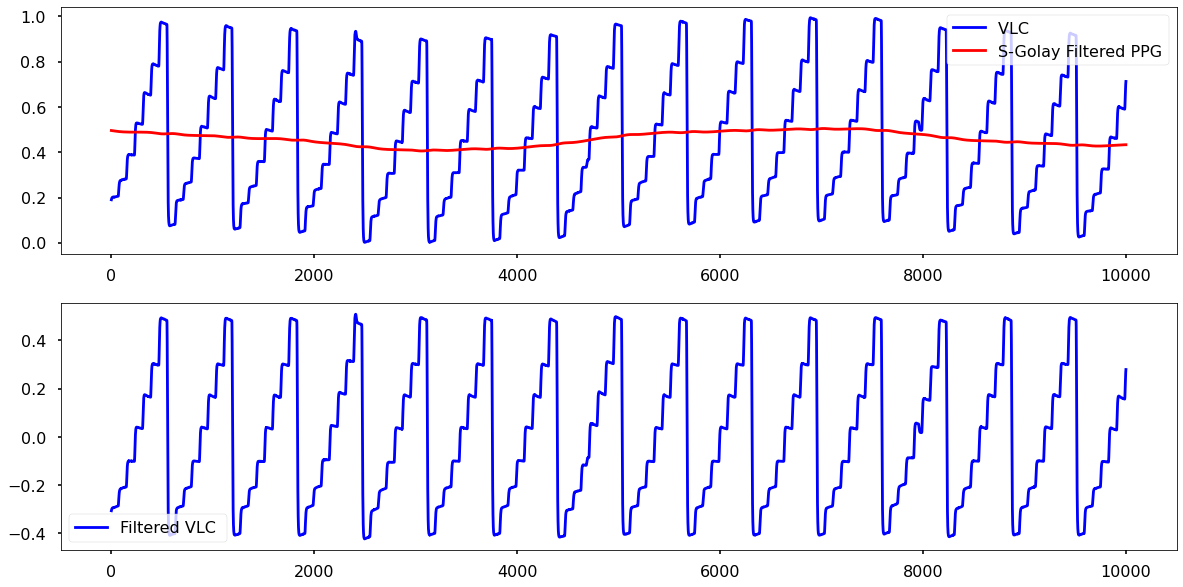

In [182]:


plt.subplots(2, 1, figsize=(20,10))
L1, L2 = 20000, 30000
#L1, L2 = 0, len(bwrPPG1)
#plt.subplot(3, 1, 1)
plt.subplot(2, 1, 1)
plt.plot(X[L1:L2], "b-", label="VLC " )
plt.plot(filter_VLC[L1:L2], "r-", label="S-Golay Filtered PPG")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(bwrVLC[L1:L2], "b-", label="Filtered VLC " )
plt.legend()

(array([4.80000e+01, 5.71520e+04, 1.28537e+05, 7.41380e+04, 6.79200e+04,
        6.86680e+04, 6.62680e+04, 6.15570e+04]),
 array([-0.66795974, -0.51268088, -0.35740202, -0.20212317, -0.04684431,
         0.10843455,  0.26371341,  0.41899227,  0.57427113]),
 <a list of 8 Patch objects>)

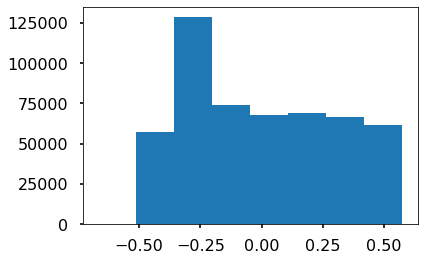

In [181]:
plt.hist(bwrVLC, bins=8)